# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Load

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

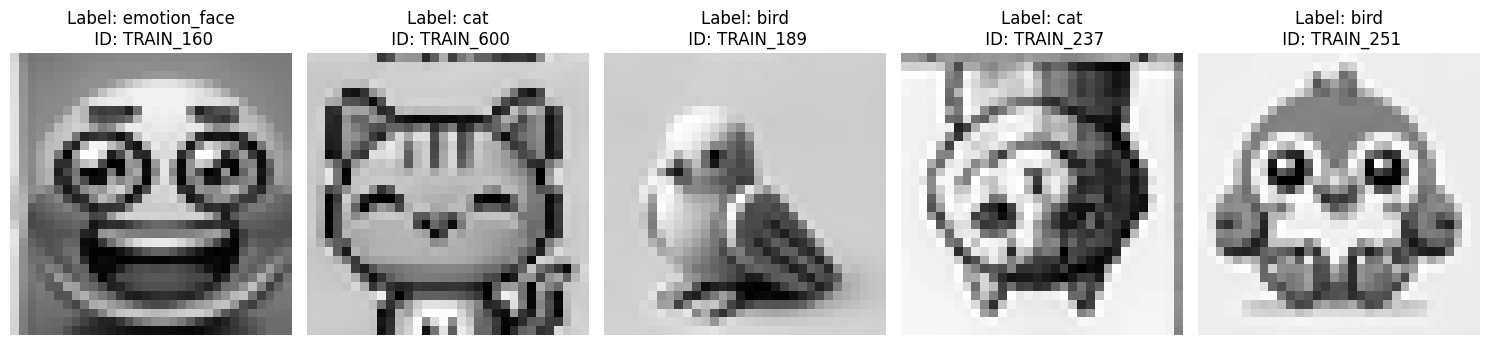

In [3]:
# train 데이터 이미지 시각화
# 랜덤 5개 샘플 선택
random_indices = np.random.choice(len(train), 5, replace=False)
samples = train.iloc[random_indices]

# 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, (idx, sample) in enumerate(samples.iterrows()):
    image_data = sample.iloc[2:].values.astype(np.uint8).reshape(32, 32)  # 32x32 변환
    axes[i].imshow(image_data, cmap='gray')
    axes[i].set_title(f"Label: {sample['label']}\n ID: {sample['ID']}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Data Pre-processing

In [26]:
# Feature(X)와 Target(y) 분리
X = train.iloc[:, 2:].values  # 이미지 데이터 (32x32 = 1024 픽셀)
y = train["label"].values     # 분류할 대상 라벨

X_test = test.iloc[:, 1:].values  # 테스트 데이터

In [27]:
# 라벨을 숫자로 변환 (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train

In [28]:
# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)

In [30]:
# 모델 학습
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='multi_logloss'
)

[1]	training's multi_logloss: 1.72875	valid_1's multi_logloss: 1.88646
[2]	training's multi_logloss: 1.43466	valid_1's multi_logloss: 1.69506
[3]	training's multi_logloss: 1.21753	valid_1's multi_logloss: 1.55042
[4]	training's multi_logloss: 1.04874	valid_1's multi_logloss: 1.43333
[5]	training's multi_logloss: 0.903408	valid_1's multi_logloss: 1.3216
[6]	training's multi_logloss: 0.778404	valid_1's multi_logloss: 1.23671
[7]	training's multi_logloss: 0.672663	valid_1's multi_logloss: 1.16949
[8]	training's multi_logloss: 0.586289	valid_1's multi_logloss: 1.11413
[9]	training's multi_logloss: 0.509707	valid_1's multi_logloss: 1.05322
[10]	training's multi_logloss: 0.44544	valid_1's multi_logloss: 0.999899
[11]	training's multi_logloss: 0.387616	valid_1's multi_logloss: 0.950305
[12]	training's multi_logloss: 0.338489	valid_1's multi_logloss: 0.917812
[13]	training's multi_logloss: 0.295102	valid_1's multi_logloss: 0.880551
[14]	training's multi_logloss: 0.258973	valid_1's multi_loglos

LGBMClassifier(max_depth=10, random_state=42)

In [31]:
# Validation Set에 대한 예측 및 성능 평가
y_valid_pred = model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print("\nValidation Accuracy:", valid_accuracy)


Validation Accuracy: 0.8506493506493507


# Prediction

In [32]:
y_pred = model.predict(X_test)

# 예측된 값을 원래 라벨로 변환
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Submission

In [33]:
submission = pd.read_csv('sample_submission.csv')

submission['label'] = y_pred_labels
submission.to_csv('./baseline_submission.csv', index = False, encoding = 'utf-8-sig')